<a href="https://colab.research.google.com/github/jmahadi/Tensorflow_Time_Series/blob/main/Time_Series_Forecasting_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting The data



In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-07-01 06:06:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.002s  

2023-07-01 06:06:59 (94.8 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [5]:
import pandas as pd
import tensorflow as tf

df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates = ['Date'],
                 index_col = ['Date'])

In [38]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [6]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)" : "Price"})

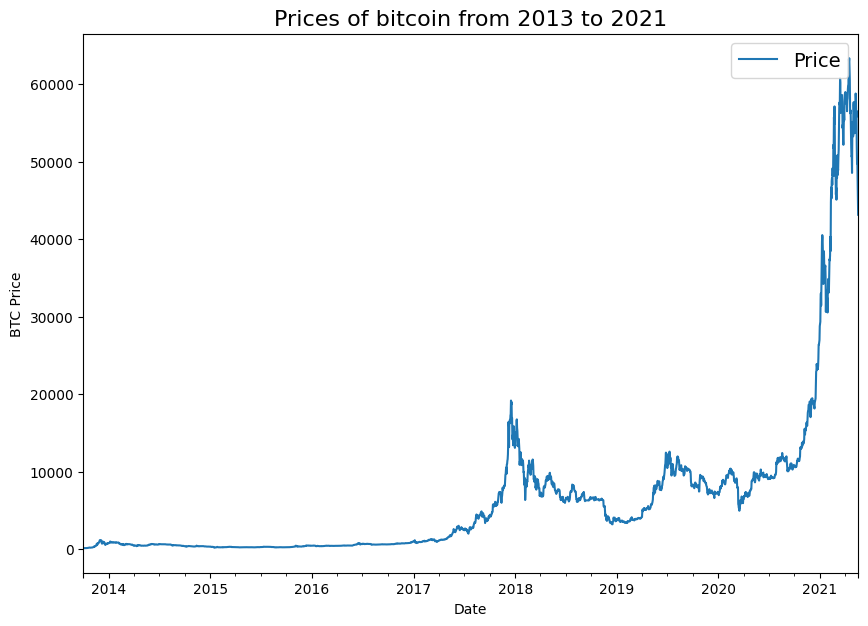

In [40]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize = (10,7))
plt.ylabel("BTC Price")
plt.title("Prices of bitcoin from 2013 to 2021",fontsize=16)
plt.legend(fontsize = 14);

##Importing data with Python's CSV module

In [7]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv','r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader) #skips first line thus gets rid of column header
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

#view some of the date
timesteps[:10], btc_price[:10]

timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

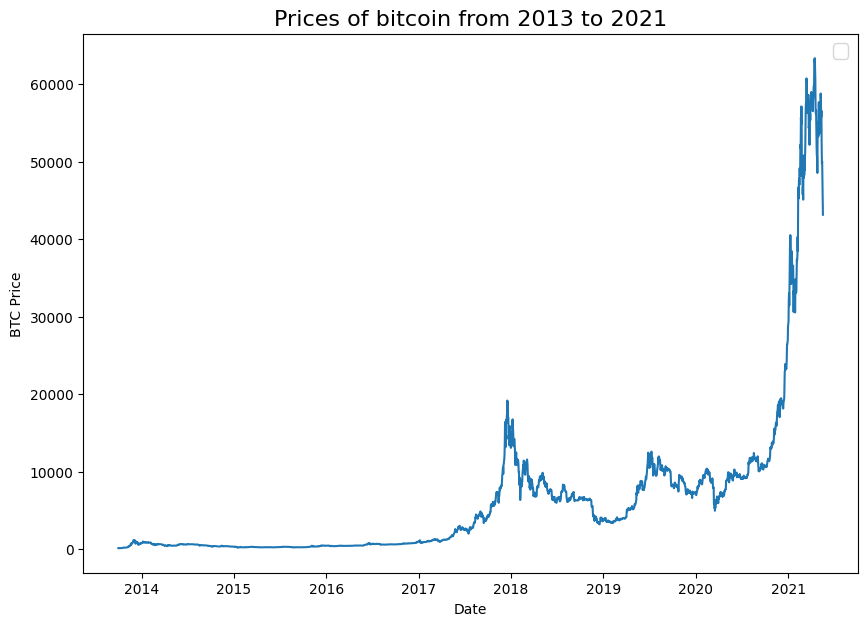

In [8]:


plt.figure(figsize = (10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Prices of bitcoin from 2013 to 2021",fontsize=16)
plt.legend(fontsize = 14);

#Format Data 1

##Forrmat data in the wrong way first (sklearn train_test_split)

In [9]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size = 0.2,
                                                    random_state= 42)

X_train.shape, X_test.shape, y_train.shape , y_test.shape

((2229,), (558,), (2229,), (558,))

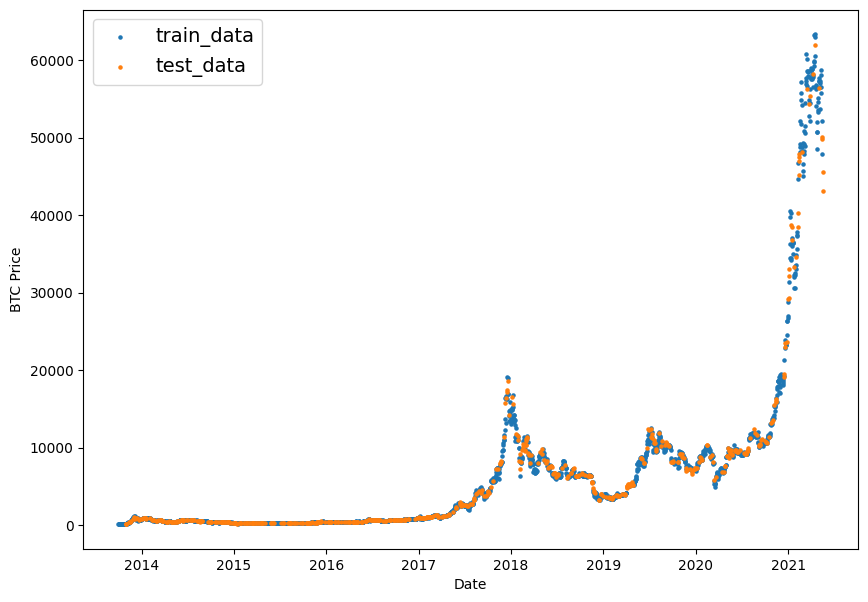

In [11]:
plt.figure(figsize = (10,7))
plt.scatter(X_train,y_train , s=5 ,label = "train_data")
plt.scatter(X_test, y_test, s=5 , label = "test_data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

##Format data in the right way

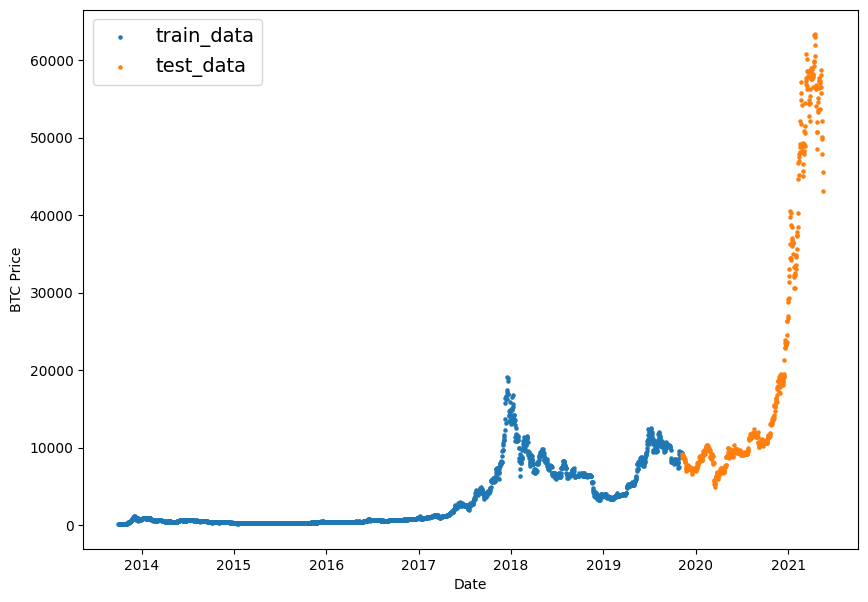

In [15]:
split_size = int(0.8 * len(prices))

X_train,y_train = timesteps[:split_size] , prices[:split_size]

X_test , y_test = timesteps[split_size:] , prices[split_size:]

plt.figure(figsize = (10,7))
plt.scatter(X_train,y_train , s=5 ,label = "train_data")
plt.scatter(X_test, y_test, s=5 , label = "test_data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

##Function to plot Timeseries

In [16]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

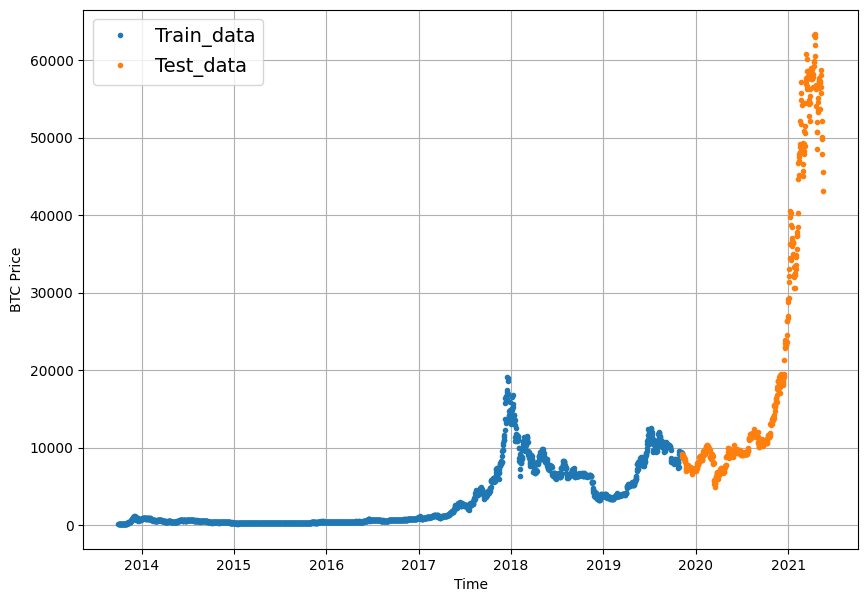

In [17]:
plt.figure(figsize = (10,7))
plot_time_series(timesteps = X_train , values = y_train, label="Train_data")
plot_time_series(timesteps = X_test, values = y_test, label = "Test_data")

#Model 0 : Naive Forecasts (Baseline)

$$\hat{y}_{t} = y_t{t-1}$$

> The prediction of timestep t (y-hat) is equal to the value at timestemp t-1 (previous_timestep)-this is for a horizon of 1

In [18]:
naive_forecast = y_test[:-1]

naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

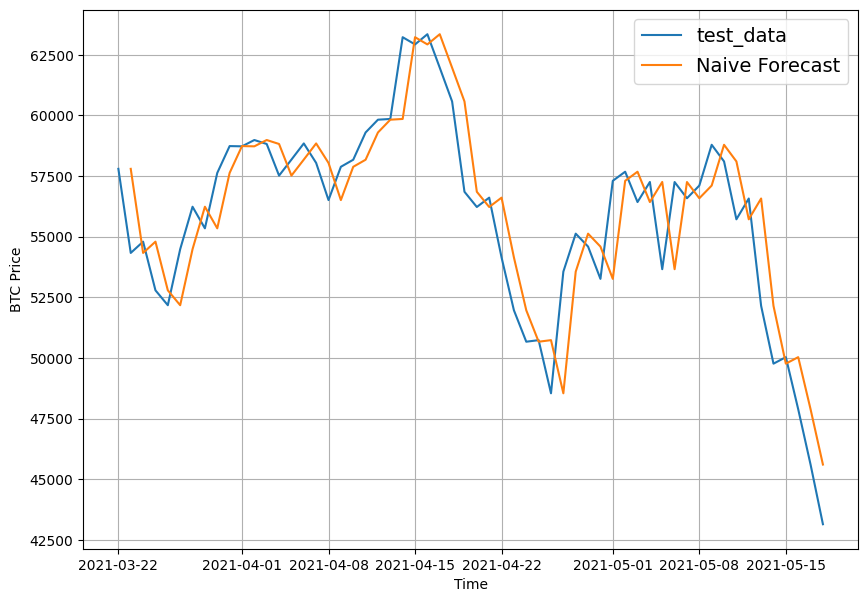

In [19]:
plt.figure(figsize = (10,7))
#plot_time_series(timesteps = X_train, values = y_train , label = "Train_data")
plot_time_series(timesteps = X_test , values = y_test ,start = 500, format="-",label= "test_data")
plot_time_series(timesteps = X_test[1:], values=naive_forecast, format="-",start = 500, label="Naive Forecast" )

##Evaluating a Model (MASE)


In [51]:
import tensorflow as tf

In [20]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE(assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  #Find MAE of naive forecast ( no seasionality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) #our seasonality is 1 day (hence the shift of 1 day)

  return mae / mae_naive_no_season




In [53]:
mean_absolute_scaled_error(y_true = y_test[1:] , y_pred = naive_forecast).numpy()

0.9995699939182624

###Function to output all evaluation metrics

In [21]:
def evaluate_pred (y_true, y_pred):

  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae" : mae.numpy(),
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          "mase" : mase.numpy()}



In [22]:
naive_results = evaluate_pred(y_true = y_test[1:],
                              y_pred = naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

#Format Data 2: Windowing our dataset

In [56]:
len(btc_price)

2787

In [23]:
HORIZON = 1
WINDOW_SIZE = 7



###Funtion to label windowed data

In [24]:
def get_labelled_window(x, horizon = HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon = 1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, - horizon: ]

In [25]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8),axis = 0))

In [60]:
print(f"Window : {tf.squeeze(test_window).numpy()} -> Label : {tf.squeeze(test_label).numpy()}")

Window : [0 1 2 3 4 5 6] -> Label : 7


##Function to view numpy arrays as windows

In [61]:
np.expand_dims(np.arange(8),axis = 0).T +[[6,10]]

array([[ 6, 10],
       [ 7, 11],
       [ 8, 12],
       [ 9, 13],
       [10, 14],
       [11, 15],
       [12, 16],
       [13, 17]])

In [26]:
def make_windows( x, window_size = WINDOW_SIZE, horizon= HORIZON):
  """
  Turns a 1D array into a 2D array of sequntial labelled windows of windows_size with horizon size lables.
  """
  #Create a window of specific window_size ( add the horizon  on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size + horizon),axis = 0)

  #Create a 2d array of multiple window_steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)),axis = 0).T #create 2d array of window size

  #Index on the target array ( a time series) with 2D array of multiple window steps
  window_array = x[window_indexes]

  #Get the labelled Windows
  windows,labels = get_labelled_window(window_array, horizon = horizon)

  return windows, labels

  #print(f"Window Step: \n {window_step}\n Window_index :\n {window_indexes, window_indexes.shape} Window array : {window_array}")

In [27]:
full_windows, full_labels = make_windows(prices)

In [28]:
##VIEW THE FUNCTION NICELY
for i in range(5):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]
Window: [118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116] -> Label: [125.27966]
Window: [121.33866 120.65533 121.795   123.033   124.049   125.96116 125.27966] -> Label: [125.9275]


In [65]:
## tf.keras.preprocessing.timeseries_dataset_from_array()

##Turning Windows to training and test set

In [29]:
def make_train_test_splits(windows, labels, test_split = 0.2 ):
  """
  Splits Matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, train_labels, test_windows, test_labels

In [30]:
train_windows, train_labels, test_windows, test_labels= make_train_test_splits( full_windows, full_labels)
len(train_windows), len(test_windows)

(2224, 556)

In [31]:
np.array_equal(np.squeeze(train_labels[:-HORIZON - 1]) , y_train[WINDOW_SIZE:])

True

In [69]:
np.squeeze(train_labels)

array([ 123.033     ,  124.049     ,  125.96116   , ..., 9335.75240233,
       9226.48582088, 8794.35864452])

In [70]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

#Create a modelling Checkpoint

In [32]:
import os

def create_model_checkpoint(model_name, save_path = 'model_experiment'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            monitor = 'val_loss',
                                            verbose = 0,
                                            save_best_only= True)

#Model 1: Dense Model(window = 7, horizon = 1)

In [33]:
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON, activation = 'linear') #linear activation is like there is no activation
], name = 'model_1_dense')

model_1.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)]
            )



Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1894.6864 - mae: 1894.6864 - mse: 10625315.0000  

18/18 [==============================] - 6s 47ms/step - loss: 1894.6864 - mae: 1894.6864 - mse: 10625315.0000 - val_loss: 1265.1472 - val_mae: 1265.1472 - val_mse: 4039535.0000
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 326.1674 - mae: 326.1674 - mse: 404598.9375 - val_loss: 1537.5564 - val_mae: 1537.5564 - val_mse: 5574144.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 213.7328 - mae: 213.7328 - mse: 153687.0469

18/18 [==============================] - 1s 30ms/step - loss: 205.5885 - mae: 205.5885 - mse: 195881.4219 - val_loss: 944.0757 - val_mae: 944.0757 - val_mse: 2686491.7500
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 162.2278 - mae: 162.2278 - mse: 136846.7500

18/18 [==============================] - 1s 45ms/step - loss: 161.7595 - mae: 161.7595 - mse: 134892.0156 - val_loss: 867.3727 - val_mae: 867.3727 - val_mse: 2413948.7500
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 153.1638 - mae: 153.1638 - mse: 130685.0078

18/18 [==============================] - 1s 32ms/step - loss: 153.1638 - mae: 153.1638 - mse: 130685.0078 - val_loss: 854.8996 - val_mae: 854.8996 - val_mse: 2342572.2500
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 150.8264 - mae: 150.8264 - mse: 125367.2812

18/18 [==============================] - 1s 31ms/step - loss: 150.8264 - mae: 150.8264 - mse: 125367.2812 - val_loss: 849.3394 - val_mae: 849.3394 - val_mse: 2380919.7500
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 146.5243 - mae: 146.5243 - mse: 120118.5469

18/18 [==============================] - 1s 33ms/step - loss: 146.5243 - mae: 146.5243 - mse: 120118.5469 - val_loss: 847.6746 - val_mae: 847.6746 - val_mse: 2258276.7500
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 116.1328 - mae: 116.1328 - mse: 55692.0547

18/18 [==============================] - 1s 31ms/step - loss: 146.4509 - mae: 146.4509 - mse: 118449.3594 - val_loss: 809.4163 - val_mae: 809.4163 - val_mse: 2149638.2500
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 144.2355 - mae: 144.2355 - mse: 117278.0859 - val_loss: 825.4031 - val_mae: 825.4031 - val_mse: 2141635.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 149.2617 - mae: 149.2617 - mse: 158859.5000

18/18 [==============================] - 1s 32ms/step - loss: 139.4221 - mae: 139.4221 - mse: 109908.2031 - val_loss: 757.1768 - val_mae: 757.1768 - val_mse: 1882888.2500
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 147.6315 - mae: 147.6315 - mse: 103942.5312

18/18 [==============================] - 1s 31ms/step - loss: 134.8100 - mae: 134.8100 - mse: 103228.9375 - val_loss: 749.3834 - val_mae: 749.3834 - val_mse: 1825029.7500
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 132.7469 - mae: 132.7469 - mse: 100528.9844 - val_loss: 764.5364 - val_mae: 764.5364 - val_mse: 1831497.8750
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 133.3529 - mae: 133.3529 - mse: 101048.6641 - val_loss: 751.2565 - val_mae: 751.2565 - val_mse: 1779030.6250
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 129.6098 - mae: 129.6098 - mse: 74028.3359

18/18 [==============================] - 1s 30ms/step - loss: 130.4639 - mae: 130.4639 - mse: 97013.3828 - val_loss: 726.6082 - val_mae: 726.6082 - val_mse: 1699986.1250
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 129.8344 - mae: 129.8344 - mse: 94570.0078 - val_loss: 728.3095 - val_mae: 728.3095 - val_mse: 1684192.5000
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 129.3506 - mae: 129.3506 - mse: 94672.9062 - val_loss: 761.3795 - val_mae: 761.3795 - val_mse: 1756891.6250
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 118.3850 - mae: 118.3850 - mse: 56464.9883

18/18 [==============================] - 1s 30ms/step - loss: 129.2989 - mae: 129.2989 - mse: 92610.7500 - val_loss: 686.4706 - val_mae: 686.4706 - val_mse: 1551573.8750
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 123.7239 - mae: 123.7239 - mse: 89374.1406 - val_loss: 691.6339 - val_mae: 691.6339 - val_mse: 1531086.8750
Epoch 19/100
18/18 [==============================] - ETA: 0s - loss: 121.8699 - mae: 121.8699 - mse: 86938.7031

18/18 [==============================] - 1s 31ms/step - loss: 121.8699 - mae: 121.8699 - mse: 86938.7031 - val_loss: 672.2504 - val_mae: 672.2504 - val_mse: 1479528.5000
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 121.7900 - mae: 121.7900 - mse: 87663.3516 - val_loss: 691.1744 - val_mae: 691.1744 - val_mse: 1591940.6250
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 149.4970 - mae: 149.4970 - mse: 96798.5625

18/18 [==============================] - 1s 41ms/step - loss: 124.6181 - mae: 124.6181 - mse: 89752.9219 - val_loss: 661.1926 - val_mae: 661.1926 - val_mse: 1444180.8750
Epoch 22/100
11/18 [=================>............] - ETA: 0s - loss: 130.6807 - mae: 130.6807 - mse: 102706.8984

18/18 [==============================] - 1s 46ms/step - loss: 121.3180 - mae: 121.3180 - mse: 85873.5000 - val_loss: 655.5369 - val_mae: 655.5369 - val_mse: 1426316.0000
Epoch 23/100
14/18 [======================>.......] - ETA: 0s - loss: 119.4477 - mae: 119.4477 - mse: 77143.3359

18/18 [==============================] - 1s 45ms/step - loss: 121.2193 - mae: 121.2193 - mse: 85311.3516 - val_loss: 646.1461 - val_mae: 646.1461 - val_mse: 1410026.5000
Epoch 24/100
18/18 [==============================] - 0s 8ms/step - loss: 119.6644 - mae: 119.6644 - mse: 84001.7578 - val_loss: 652.5314 - val_mae: 652.5314 - val_mse: 1449065.2500
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 119.1185 - mae: 119.1185 - mse: 81924.7031 - val_loss: 691.4091 - val_mae: 691.4091 - val_mse: 1576536.0000
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 123.2544 - mae: 123.2544 - mse: 84106.7891 - val_loss: 655.4725 - val_mae: 655.4725 - val_mse: 1454806.7500
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 165.8949 - mae: 165.8949 - mse: 132531.1406

18/18 [==============================] - 1s 32ms/step - loss: 119.2702 - mae: 119.2702 - mse: 83368.5547 - val_loss: 636.2742 - val_mae: 636.2742 - val_mse: 1385244.3750
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 111.8050 - mae: 111.8050 - mse: 63806.3984

18/18 [==============================] - 1s 31ms/step - loss: 117.4296 - mae: 117.4296 - mse: 80427.3516 - val_loss: 632.1785 - val_mae: 632.1785 - val_mse: 1350450.0000
Epoch 29/100
15/18 [========================>.....] - ETA: 0s - loss: 120.1936 - mae: 120.1936 - mse: 84411.7656

18/18 [==============================] - 1s 32ms/step - loss: 119.2150 - mae: 119.2150 - mse: 82513.2656 - val_loss: 631.7018 - val_mae: 631.7018 - val_mse: 1345689.3750
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 118.6854 - mae: 118.6854 - mse: 80808.2578 - val_loss: 637.2835 - val_mae: 637.2835 - val_mse: 1356032.7500
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 119.4587 - mae: 119.4587 - mse: 80086.0859 - val_loss: 717.9879 - val_mae: 717.9879 - val_mse: 1557200.2500
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 118.1160 - mae: 118.1160 - mse: 81108.2891 - val_loss: 641.0707 - val_mae: 641.0707 - val_mse: 1358198.1250
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 151.1392 - mae: 151.1392 - mse: 157289.5625

18/18 [==============================] - 1s 46ms/step - loss: 114.2397 - mae: 114.2397 - mse: 76879.8672 - val_loss: 625.2784 - val_mae: 625.2784 - val_mse: 1321918.8750
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 139.9255 - mae: 139.9255 - mse: 140681.5000

18/18 [==============================] - 1s 31ms/step - loss: 116.8156 - mae: 116.8156 - mse: 80729.5703 - val_loss: 618.8090 - val_mae: 618.8090 - val_mse: 1304270.2500
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 101.1661 - mae: 101.1661 - mse: 50657.2891

18/18 [==============================] - 1s 32ms/step - loss: 114.0674 - mae: 114.0674 - mse: 78056.1875 - val_loss: 613.5579 - val_mae: 613.5579 - val_mse: 1290246.5000
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 121.1422 - mae: 121.1422 - mse: 80783.9609 - val_loss: 692.1646 - val_mae: 692.1646 - val_mse: 1477946.7500
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 116.6138 - mae: 116.6138 - mse: 77977.6484 - val_loss: 630.8698 - val_mae: 630.8698 - val_mse: 1326565.1250
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 109.9158 - mae: 109.9158 - mse: 65034.6992

18/18 [==============================] - 1s 32ms/step - loss: 113.9007 - mae: 113.9007 - mse: 75983.3203 - val_loss: 605.0746 - val_mae: 605.0746 - val_mse: 1274347.0000
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6167 - mae: 113.6167 - mse: 76347.1250 - val_loss: 648.6226 - val_mae: 648.6226 - val_mse: 1398721.2500
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 111.1841 - mae: 111.1841 - mse: 90523.7812

18/18 [==============================] - 1s 30ms/step - loss: 113.3385 - mae: 113.3385 - mse: 77591.6172 - val_loss: 597.8569 - val_mae: 597.8569 - val_mse: 1249720.3750
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2635 - mae: 112.2635 - mse: 76283.2812 - val_loss: 603.2648 - val_mae: 603.2648 - val_mse: 1267692.3750
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 116.1999 - mae: 116.1999 - mse: 78464.3438 - val_loss: 603.0038 - val_mae: 603.0038 - val_mse: 1256167.8750
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 111.9015 - mae: 111.9015 - mse: 73472.3438 - val_loss: 601.0778 - val_mae: 601.0778 - val_mse: 1263457.7500
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0162 - mae: 112.0162 - mse: 74957.0469 - val_loss: 618.7670 - val_mae: 618.7670 - val_mse: 1312978.8750
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 83.1936 - mae: 83.1936 - mse: 39

18/18 [==============================] - 1s 32ms/step - loss: 109.3236 - mae: 109.3236 - mse: 73233.5625 - val_loss: 597.7078 - val_mae: 597.7078 - val_mse: 1240793.7500
Epoch 46/100
13/18 [====================>.........] - ETA: 0s - loss: 112.5963 - mae: 112.5963 - mse: 79268.5156

18/18 [==============================] - 1s 58ms/step - loss: 110.3873 - mae: 110.3873 - mse: 72986.1250 - val_loss: 593.8460 - val_mae: 593.8460 - val_mse: 1241984.0000
Epoch 47/100
18/18 [==============================] - 0s 13ms/step - loss: 112.0458 - mae: 112.0458 - mse: 75329.9453 - val_loss: 716.5891 - val_mae: 716.5891 - val_mse: 1517744.1250
Epoch 48/100
18/18 [==============================] - 0s 12ms/step - loss: 111.7540 - mae: 111.7540 - mse: 72733.1641 - val_loss: 618.1533 - val_mae: 618.1533 - val_mse: 1279384.0000
Epoch 49/100
14/18 [======================>.......] - ETA: 0s - loss: 116.2582 - mae: 116.2582 - mse: 79958.1953

18/18 [==============================] - 1s 74ms/step - loss: 115.2370 - mae: 115.2370 - mse: 74510.8125 - val_loss: 591.2971 - val_mae: 591.2971 - val_mse: 1232325.7500
Epoch 50/100
18/18 [==============================] - 0s 13ms/step - loss: 108.7280 - mae: 108.7280 - mse: 71984.9766 - val_loss: 625.4077 - val_mae: 625.4077 - val_mse: 1326954.8750
Epoch 51/100
18/18 [==============================] - 0s 11ms/step - loss: 109.5631 - mae: 109.5631 - mse: 71806.0312 - val_loss: 595.4749 - val_mae: 595.4749 - val_mse: 1226811.1250
Epoch 52/100
18/18 [==============================] - 0s 8ms/step - loss: 110.3160 - mae: 110.3160 - mse: 73513.8750 - val_loss: 609.2081 - val_mae: 609.2081 - val_mse: 1281424.2500
Epoch 53/100
18/18 [==============================] - 0s 11ms/step - loss: 110.3610 - mae: 110.3610 - mse: 73151.3672 - val_loss: 605.6570 - val_mae: 605.6570 - val_mse: 1245214.1250
Epoch 54/100
18/18 [==============================] - 0s 17ms/step - loss: 112.9207 - mae: 112.9207

18/18 [==============================] - 2s 101ms/step - loss: 107.8123 - mae: 107.8123 - mse: 70660.4922 - val_loss: 582.3679 - val_mae: 582.3679 - val_mse: 1207242.8750
Epoch 60/100
18/18 [==============================] - 0s 15ms/step - loss: 110.1281 - mae: 110.1281 - mse: 73596.6953 - val_loss: 639.6658 - val_mae: 639.6658 - val_mse: 1314460.7500
Epoch 61/100
18/18 [==============================] - 0s 11ms/step - loss: 111.0825 - mae: 111.0825 - mse: 74030.6172 - val_loss: 602.5811 - val_mae: 602.5811 - val_mse: 1232230.5000
Epoch 62/100
18/18 [==============================] - 0s 10ms/step - loss: 109.5914 - mae: 109.5914 - mse: 71375.9844 - val_loss: 599.4620 - val_mae: 599.4620 - val_mse: 1252238.2500
Epoch 63/100
18/18 [==============================] - 0s 9ms/step - loss: 111.1907 - mae: 111.1907 - mse: 72767.7266 - val_loss: 611.8699 - val_mae: 611.8699 - val_mse: 1251693.1250
Epoch 64/100
18/18 [==============================] - 0s 12ms/step - loss: 111.1274 - mae: 111.127

18/18 [==============================] - 1s 82ms/step - loss: 107.1405 - mae: 107.1405 - mse: 70091.1719 - val_loss: 575.3781 - val_mae: 575.3781 - val_mse: 1184130.7500
Epoch 73/100
18/18 [==============================] - 0s 16ms/step - loss: 109.5555 - mae: 109.5555 - mse: 70775.4062 - val_loss: 592.5613 - val_mae: 592.5613 - val_mse: 1233155.8750
Epoch 74/100
15/18 [========================>.....] - ETA: 0s - loss: 106.4533 - mae: 106.4533 - mse: 71765.8438

18/18 [==============================] - 2s 122ms/step - loss: 106.4667 - mae: 106.4667 - mse: 69571.7969 - val_loss: 572.7778 - val_mae: 572.7778 - val_mse: 1180038.5000
Epoch 75/100
18/18 [==============================] - 0s 12ms/step - loss: 108.4271 - mae: 108.4271 - mse: 70081.8516 - val_loss: 658.3384 - val_mae: 658.3384 - val_mse: 1349593.0000
Epoch 76/100
18/18 [==============================] - 0s 16ms/step - loss: 109.8244 - mae: 109.8244 - mse: 71252.9609 - val_loss: 576.1648 - val_mae: 576.1648 - val_mse: 1177318.1250
Epoch 77/100
18/18 [==============================] - 0s 11ms/step - loss: 108.6703 - mae: 108.6703 - mse: 69219.5078 - val_loss: 584.1575 - val_mae: 584.1575 - val_mse: 1214013.0000
Epoch 78/100
18/18 [==============================] - 0s 12ms/step - loss: 106.7624 - mae: 106.7624 - mse: 68838.7656 - val_loss: 574.2411 - val_mae: 574.2411 - val_mse: 1185079.8750
Epoch 79/100
18/18 [==============================] - 0s 12ms/step - loss: 106.3613 - mae: 106.36

18/18 [==============================] - 1s 66ms/step - loss: 109.2823 - mae: 109.2823 - mse: 70645.3203 - val_loss: 571.6964 - val_mae: 571.6964 - val_mse: 1177033.8750
Epoch 85/100
18/18 [==============================] - 0s 22ms/step - loss: 105.9275 - mae: 105.9275 - mse: 68982.7344 - val_loss: 593.6434 - val_mae: 593.6434 - val_mse: 1205686.6250
Epoch 86/100
18/18 [==============================] - 0s 16ms/step - loss: 109.4441 - mae: 109.4441 - mse: 69609.6797 - val_loss: 630.9799 - val_mae: 630.9799 - val_mse: 1281782.5000
Epoch 87/100
18/18 [==============================] - 0s 17ms/step - loss: 106.3296 - mae: 106.3296 - mse: 66928.5000 - val_loss: 618.7063 - val_mae: 618.7063 - val_mse: 1287624.7500
Epoch 88/100
15/18 [========================>.....] - ETA: 0s - loss: 110.9014 - mae: 110.9014 - mse: 75935.4141

18/18 [==============================] - 2s 108ms/step - loss: 107.3833 - mae: 107.3833 - mse: 70814.0859 - val_loss: 570.4258 - val_mae: 570.4258 - val_mse: 1172300.7500
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 105.8140 - mae: 105.8140 - mse: 67866.0312 - val_loss: 571.7008 - val_mae: 571.7008 - val_mse: 1178589.1250
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 105.9801 - mae: 105.9801 - mse: 68025.4141 - val_loss: 655.4255 - val_mae: 655.4255 - val_mse: 1335431.3750
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7271 - mae: 113.7271 - mse: 72641.5703 - val_loss: 606.7010 - val_mae: 606.7010 - val_mse: 1264075.7500
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 106.2431 - mae: 106.2431 - mse: 69535.2266 - val_loss: 602.6757 - val_mae: 602.6757 - val_mse: 1256822.1250
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1030 - mae: 113.1030 - 

18/18 [==============================] - 1s 31ms/step - loss: 104.9719 - mae: 104.9719 - mse: 67384.4062 - val_loss: 568.6294 - val_mae: 568.6294 - val_mse: 1165926.5000
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9625 - mae: 106.9625 - mse: 68480.2500 - val_loss: 596.6313 - val_mae: 596.6313 - val_mse: 1238519.8750
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 107.0654 - mae: 107.0654 - mse: 69651.2422 - val_loss: 569.8202 - val_mae: 569.8202 - val_mse: 1164453.8750
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 106.2139 - mae: 106.2139 - mse: 68512.9531 - val_loss: 590.5430 - val_mae: 590.5430 - val_mse: 1224655.8750
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 150.9046 - mae: 150.9046 - mse: 124924.3359

18/18 [==============================] - 1s 31ms/step - loss: 106.3551 - mae: 106.3551 - mse: 69454.6172 - val_loss: 567.3584 - val_mae: 567.3584 - val_mse: 1158326.7500
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6192 - mae: 114.6192 - mse: 71036.2031 - val_loss: 625.6641 - val_mae: 625.6641 - val_mse: 1267457.7500


In [34]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 625.6641 - mae: 625.6641 - mse: 1267457.8750


[625.6641235351562, 625.6641235351562, 1267457.875]

In [35]:
#Loading in the saved best performing model
model_1 = tf.keras.models.load_model('model_experiment/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 567.3584 - mae: 567.3584 - mse: 1158326.7500


[567.3583984375, 567.3583984375, 1158326.75]

## Making forcasts with a model (on the test dataset)

In [36]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [37]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds),model_1_preds[:5]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([8816.422, 8758.862, 8992.599, 8726.641, 8729.668], dtype=float32)>)

In [38]:
model_1_results = evaluate_pred(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)

In [39]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [40]:
model_1_results

{'mae': 567.3584,
 'mse': 1158326.8,
 'rmse': 1076.2559,
 'mape': 2.535033,
 'mase': 0.9966916}

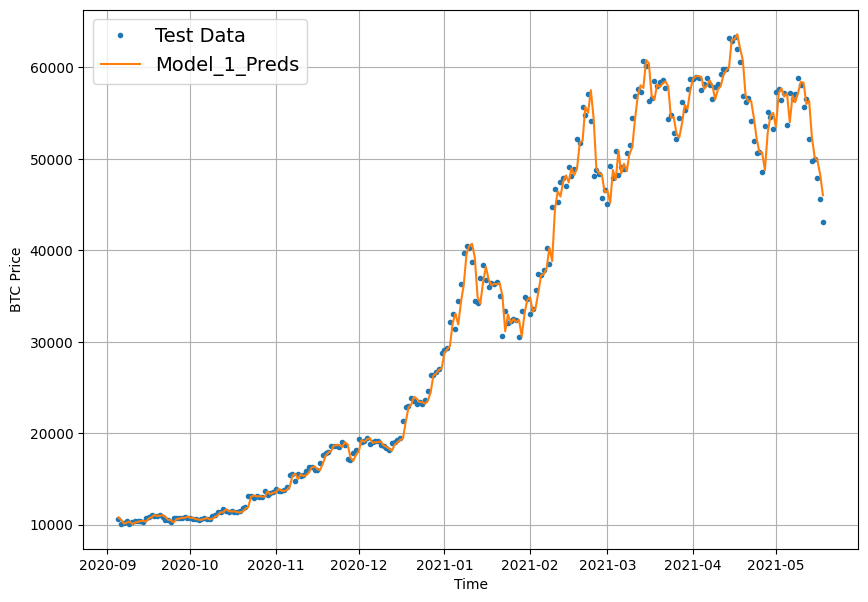

In [41]:
offset = 300
plt.figure(figsize = (10,7))

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label= "Test Data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format = "-",
                 label= "Model_1_Preds")


#Model 2: Dense Model(window = 30, horizon = 1 )

In [42]:
HORIZON = 1
WINDOW_SIZE = 30

In [43]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [44]:
train_windows, train_labels, test_windows,  test_labels = make_train_test_splits(windows = full_windows,
                                                                                labels = full_labels,
                                                                                test_split = 0.2)

In [45]:
len(train_windows), len(test_windows) , len(train_labels) , len(test_labels)

(2205, 552, 2205, 552)

In [46]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128 , activation = 'relu'),
    layers.Dense (HORIZON)
  ], name = "model_2_dense")

model_2.compile( loss ="mae",
                optimizer = tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs =100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows,test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

In [47]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 693.0162


693.0161743164062

In [48]:
model_2 = tf.keras.models.load_model('model_experiment/model_2_dense/')
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9590


608.958984375

In [49]:
model_2_preds = make_preds(model_2,
                           input_data = test_windows)

18/18 [==============================] - 0s 2ms/step


In [50]:
model_2_results = evaluate_pred(y_true = tf.squeeze(test_labels),
                                y_pred = model_2_preds)

In [51]:
model_2_results

{'mae': 608.959,
 'mse': 1288560.8,
 'rmse': 1135.1478,
 'mape': 2.7224321,
 'mase': 1.0644662}

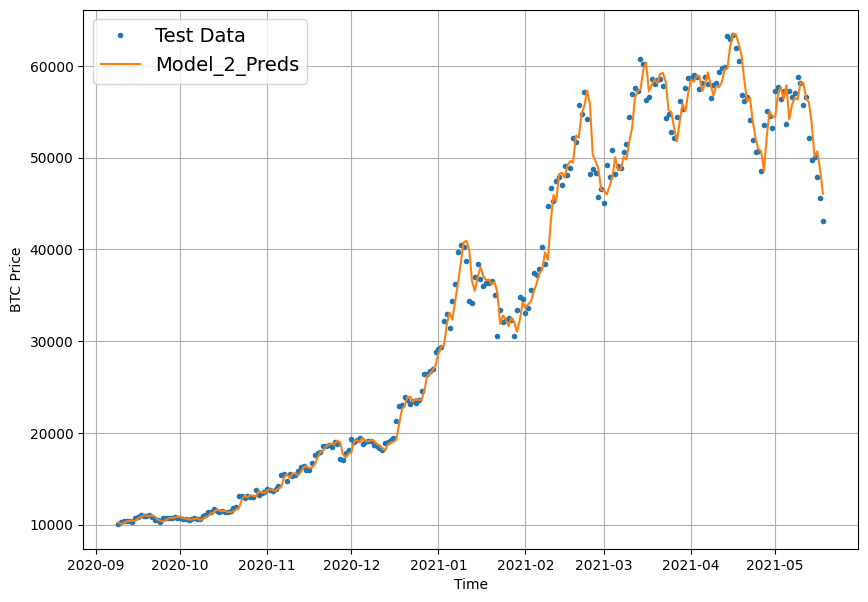

In [52]:
offset = 300
plt.figure(figsize = (10,7))

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label= "Test Data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_2_preds,
                 start = offset,
                 format = "-",
                 label= "Model_2_Preds")

#Model 3: Dense Model ( Window= 30, horizon = 7)

In [62]:
HORIZON = 7
WINDOW_SIZE = 30

In [63]:
full_windows, full_labels = make_windows(prices , window_size = WINDOW_SIZE, horizon = HORIZON)

In [64]:
len(full_windows), len(full_labels)

(2751, 2751)

In [65]:
train_windows, train_labels, test_windows, test_labels = make_train_test_splits(windows = full_windows,
                                                                               labels = full_labels)

In [66]:
len(train_windows), len(test_windows) , len(train_labels) , len(test_labels)

(2200, 551, 2200, 551)

In [67]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128 , activation = 'relu'),
    layers.Dense (HORIZON)
  ], name = "model_3_dense")

model_3.compile( loss ="mae",
                optimizer = tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            epochs =100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows,test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

In [69]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 1310.7504


1310.7503662109375

In [70]:
model_3 = tf.keras.models.load_model("model_experiment/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 1228.3618


1228.36181640625

In [72]:
model_3_preds = make_preds(model_3,
                           input_data = test_windows)
model_3_preds[:3]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9468.424 , 9230.924 , 9323.72  , 9536.425 , 9474.081 , 9408.774 ,
        9405.77  ],
       [9019.592 , 8870.242 , 9031.084 , 9209.098 , 9119.296 , 9056.671 ,
        9080.695 ],
       [8977.52  , 8975.136 , 8895.844 , 9307.7295, 9205.1045, 9031.128 ,
        9008.368 ]], dtype=float32)>

In [74]:
model_3_results = evaluate_pred(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)